# Loan Application Status Prediction

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("All libraries are loaded succesfully")

All libraries are loaded succesfully


In [2]:
df = pd.read_csv("Loanpred.csv")
print("Loan Application Status  Prediction data loaded succesfully")

Loan Application Status  Prediction data loaded succesfully


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Label DataSets-

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Independent Variables-

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Target variable

- Loan_Status

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In this dataset-

Object Data type:- Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area and Loan_status

Int data type:- ApplicantIncome

Float data type:- CoapplicantIncome,LoanAmount,Loas_Amount_term and Credit_History

In [8]:
df.shape

(614, 13)

So there is 614 rows and 13 columns

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

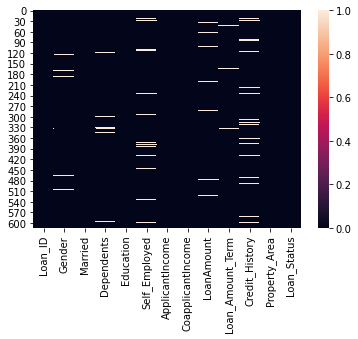

In [10]:
sns.heatmap(df.isnull())

So, in this daatset following columns are having null values-

Gender- 13

Married- 3

Dependents- 15

Self_Employed- 32

Loan_Amount- 22

Loan_Amount_Term- 14

Credit_history- 50

In [11]:
print("VALUE COUNT OF EACH COlUMNS")
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

VALUE COUNT OF EACH COlUMNS
LP002377    1
LP002795    1
LP001736    1
LP002403    1
LP002545    1
           ..
LP002262    1
LP002369    1
LP001546    1
LP002459    1
LP001518    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1

In [12]:
object_col=['Gender','Married','Dependents','Self_Employed','Credit_History']

for i in object_col:
    df[i].fillna(df[i].mode()[0],inplace=True)
    
int_col=['LoanAmount','Loan_Amount_Term']

for i in int_col:
    df[i].fillna(df[i].mean(),inplace=True)

Here, null values for numerical variables we are using mean of the respective column and for categorical variables we are using the mode of the data

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

now there is null values are presnt in the dataset.

In [16]:
df['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

Here all the values of Loan Id's are unique so we are dropping this column from the datset.

In [18]:
df.drop("Loan_ID",axis=1,inplace=True)

In [21]:
for i in df.columns:
    df[i].unique()
    print(df[i])

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object
0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object
0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object
0          Graduate
1          Graduate
2          Graduate
3      Not Graduate
4          Graduate
           ...     
609        Graduate
610        Graduate
611        Graduate
612        Graduate
613        Graduate
Name: Education, Length: 614, dtype: object
0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object
0      5849
1      4583
2      3000
3      2583
4     

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [24]:
df.shape

(614, 12)

# Data Visualization

# Univariate analysis

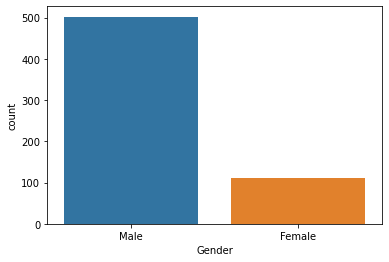

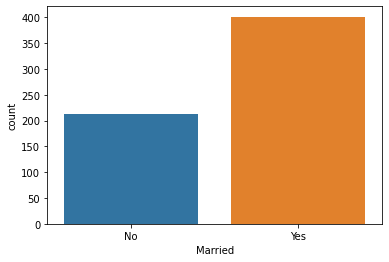

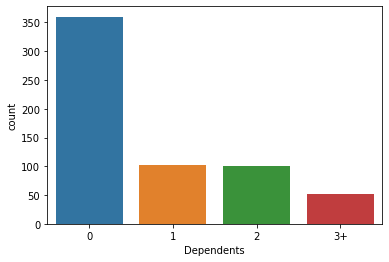

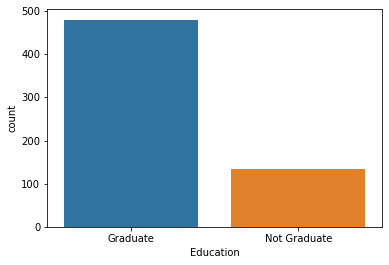

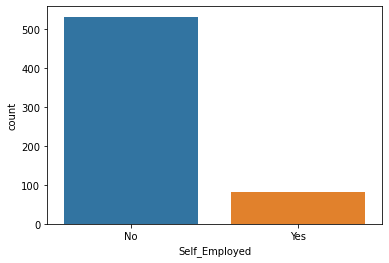

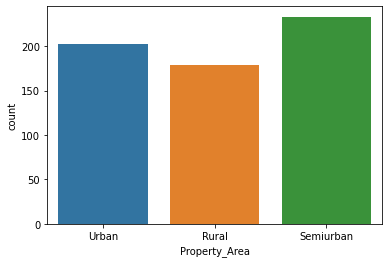

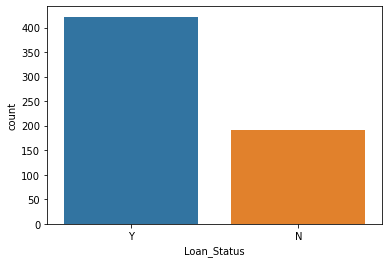

In [25]:
for i in df.columns:
    if df[i].dtypes==object:
        sns.countplot(df[i])
        plt.show()

From the aboive observations-

Most of the people in the dataset are male.

Most of the people are married.

Most of the people don't have dependents.

Most of the people are graduate

Most of the applicants are not self-employed

Mostly applicants are from semi-urban area

And, mostly importantly most of the loan status are approved.

In [26]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

422 loan proposals were accepted and 192 were rejected in the datset.

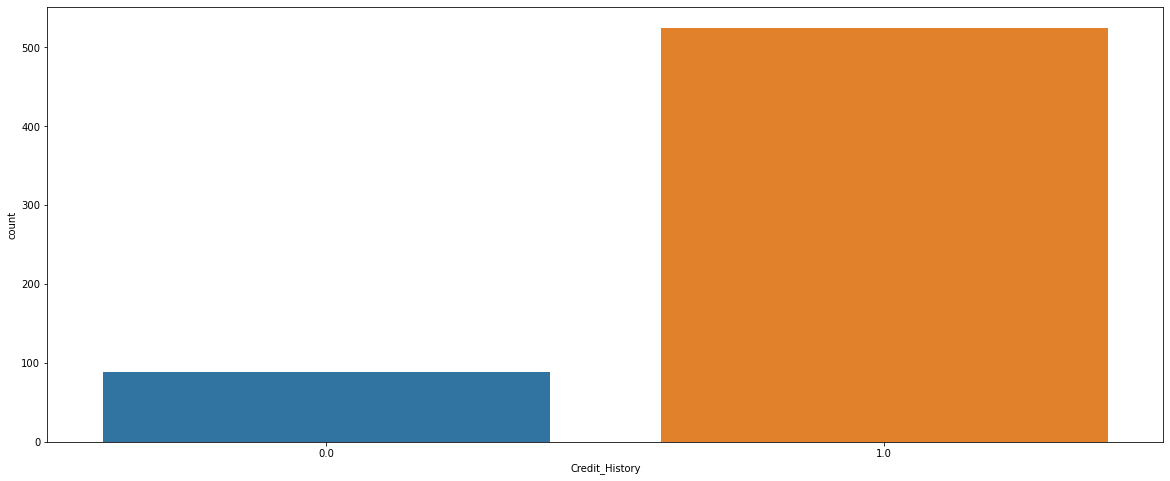

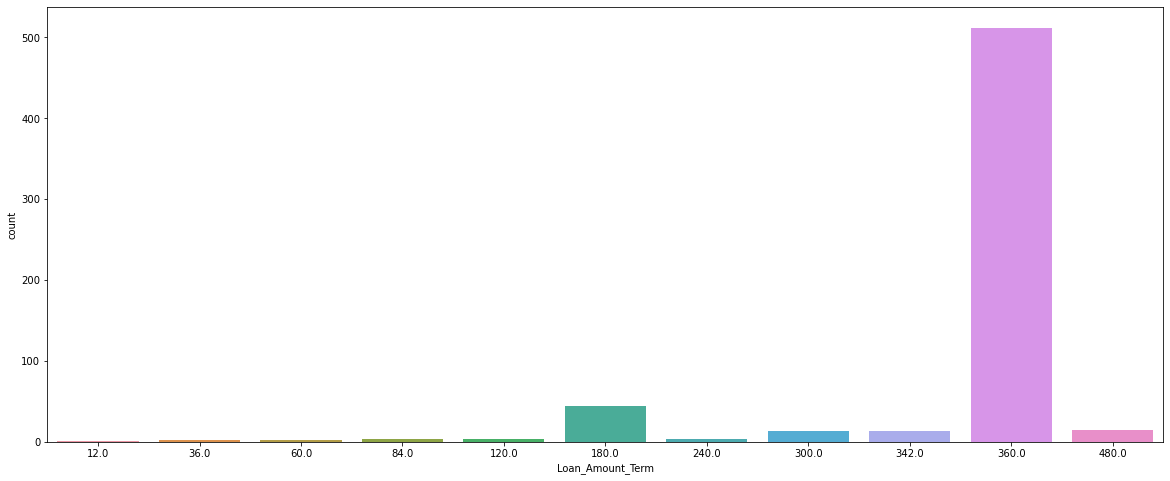

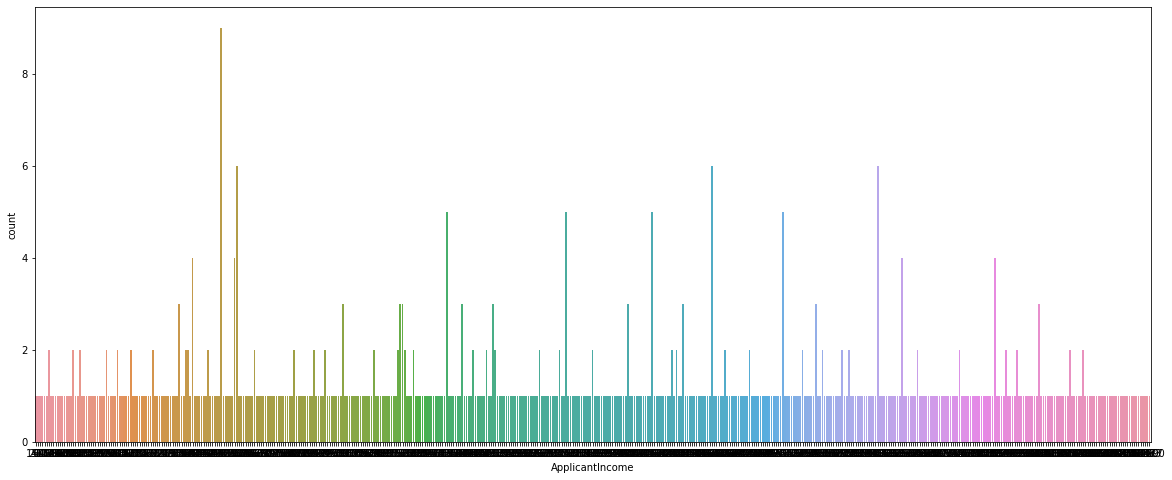

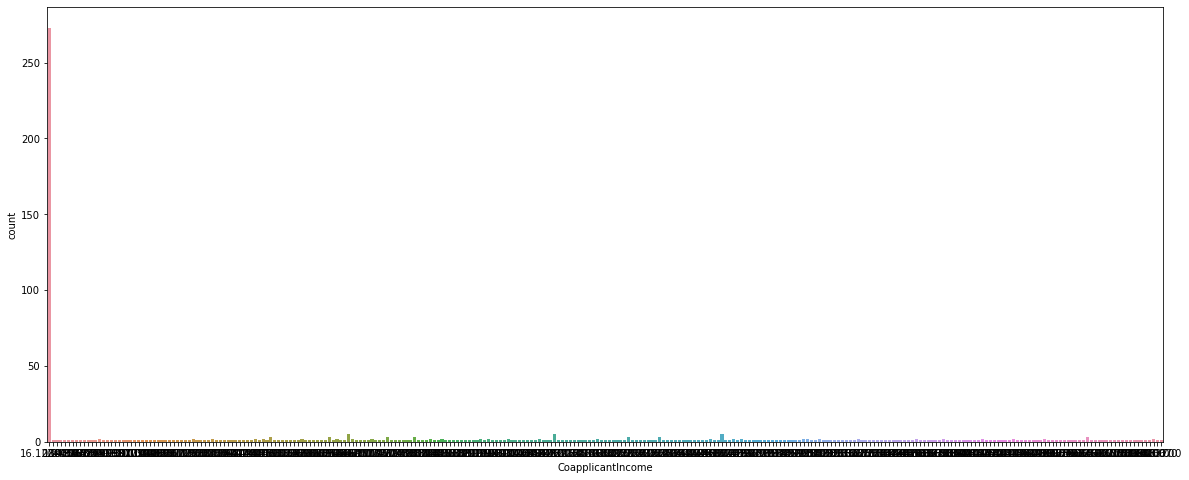

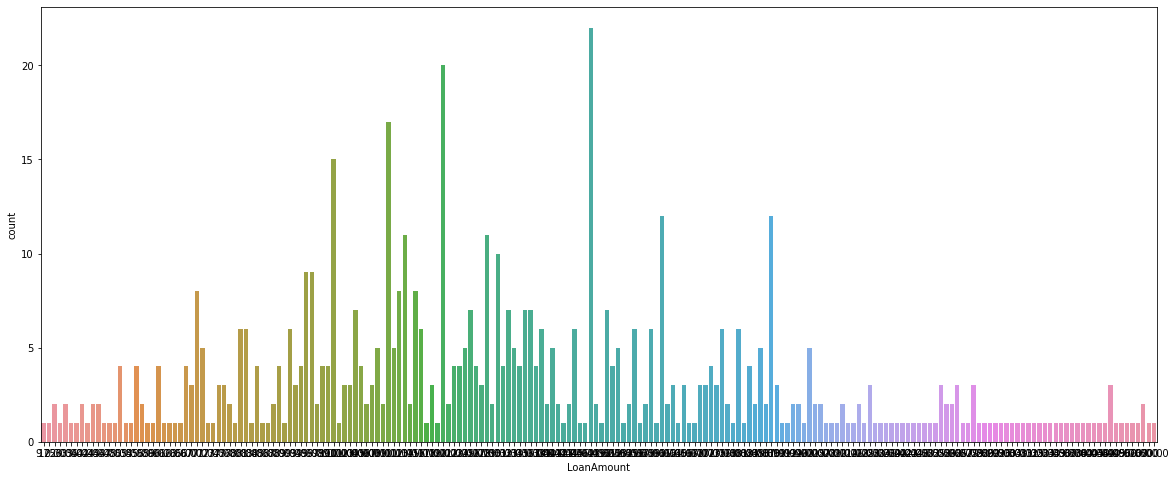

In [29]:
new_col=['Credit_History','Loan_Amount_Term','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for i in new_col:
    plt.figure(figsize=(20,8))
    sns.countplot(df[i])
    plt.show()

from the above observations-

Most of the people have good credit history.

Most of the people have repay after 360 months for loan amount terms.

# Bivariate Analysis

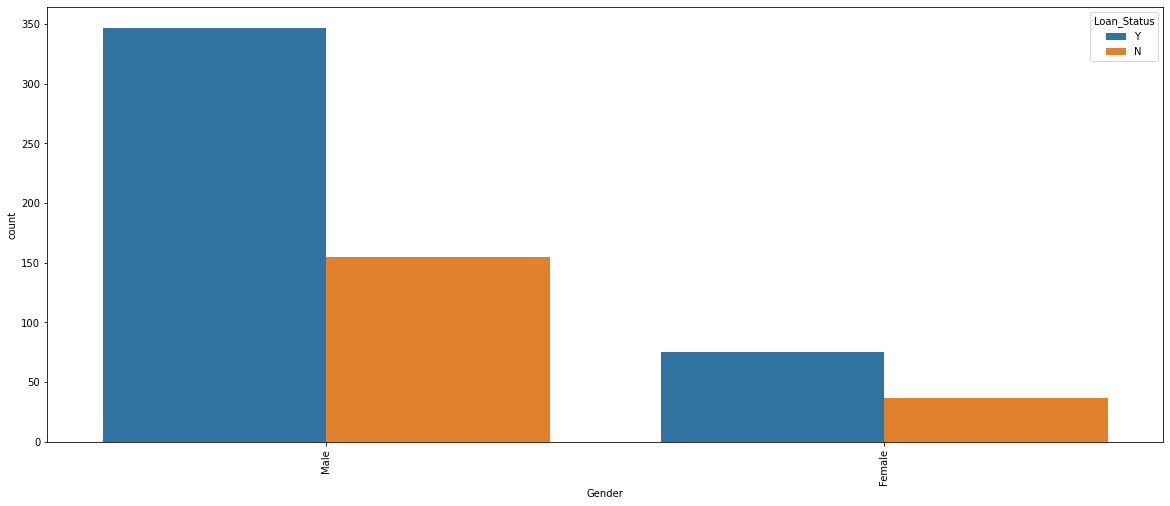

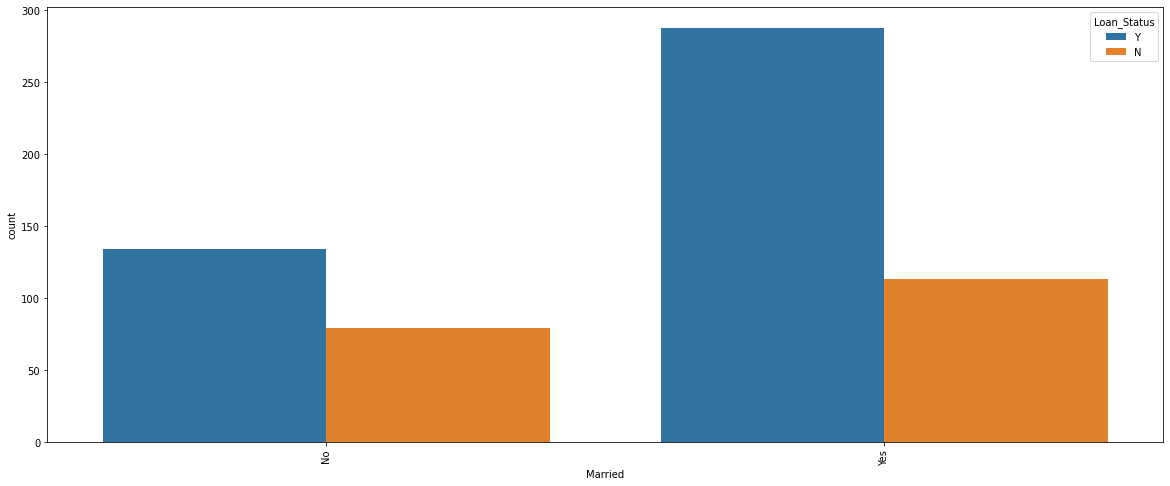

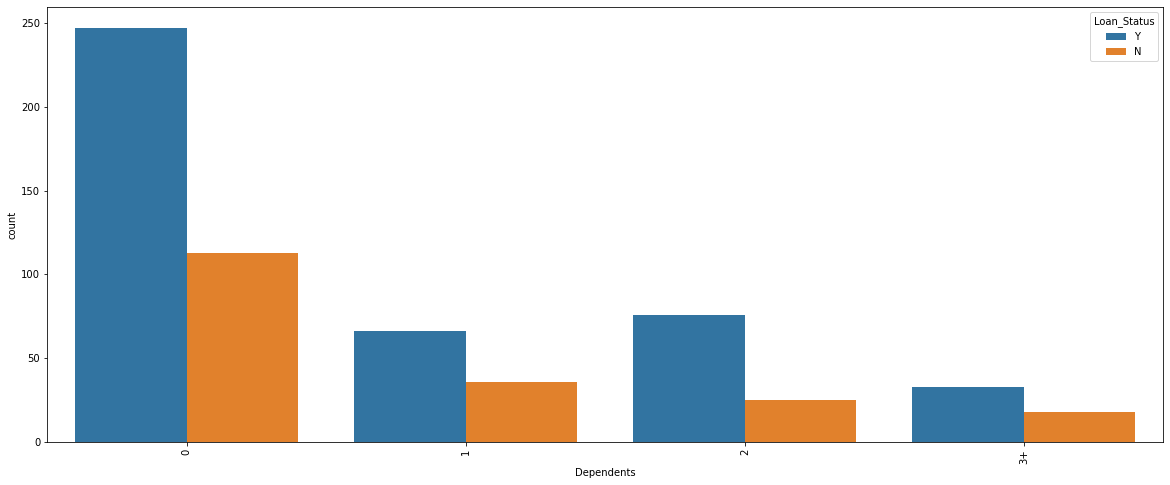

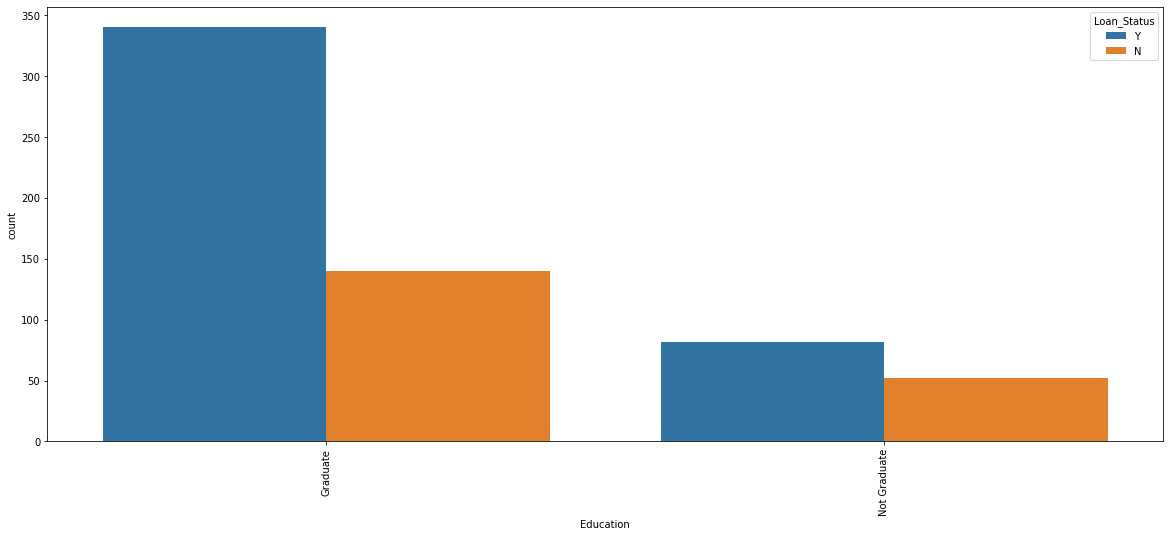

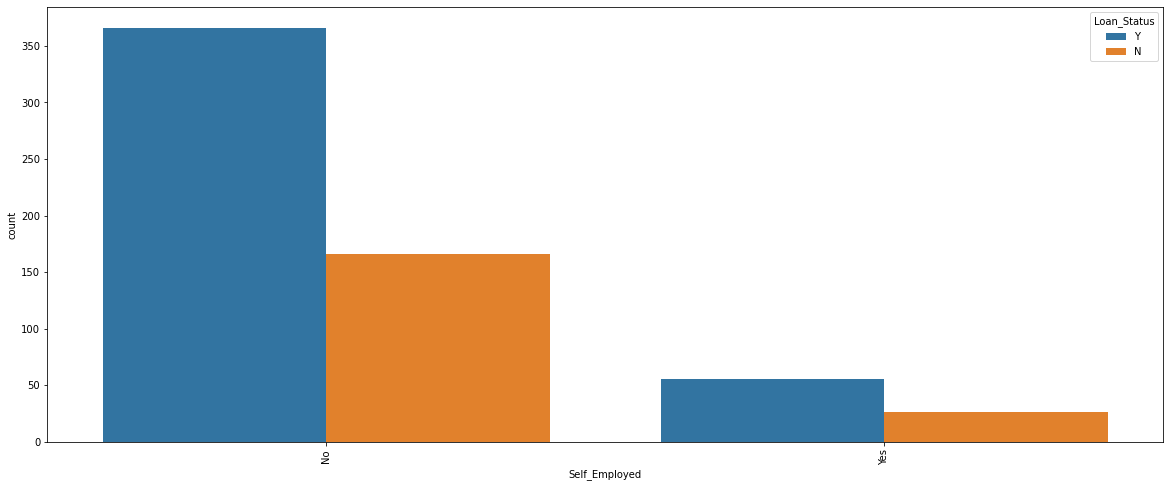

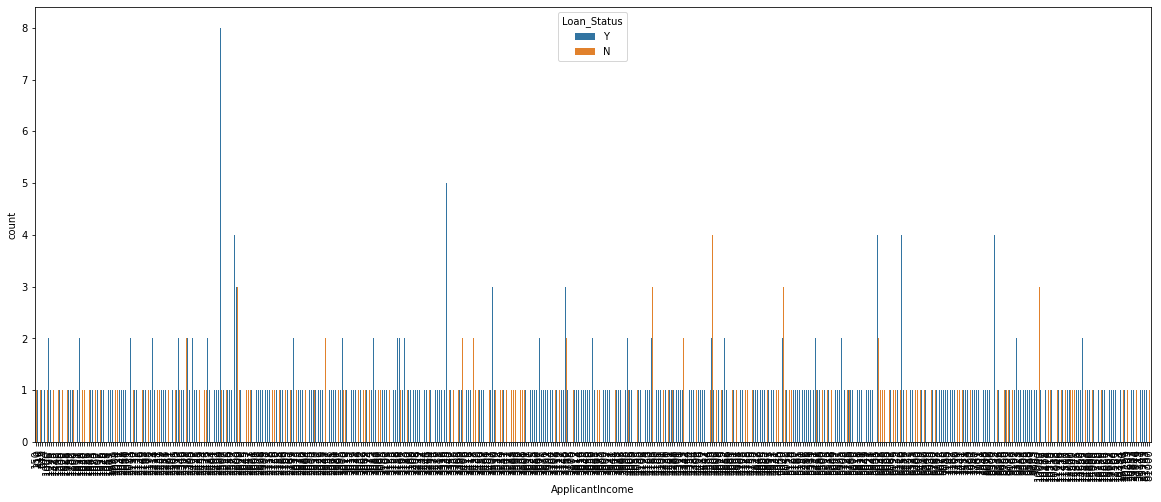

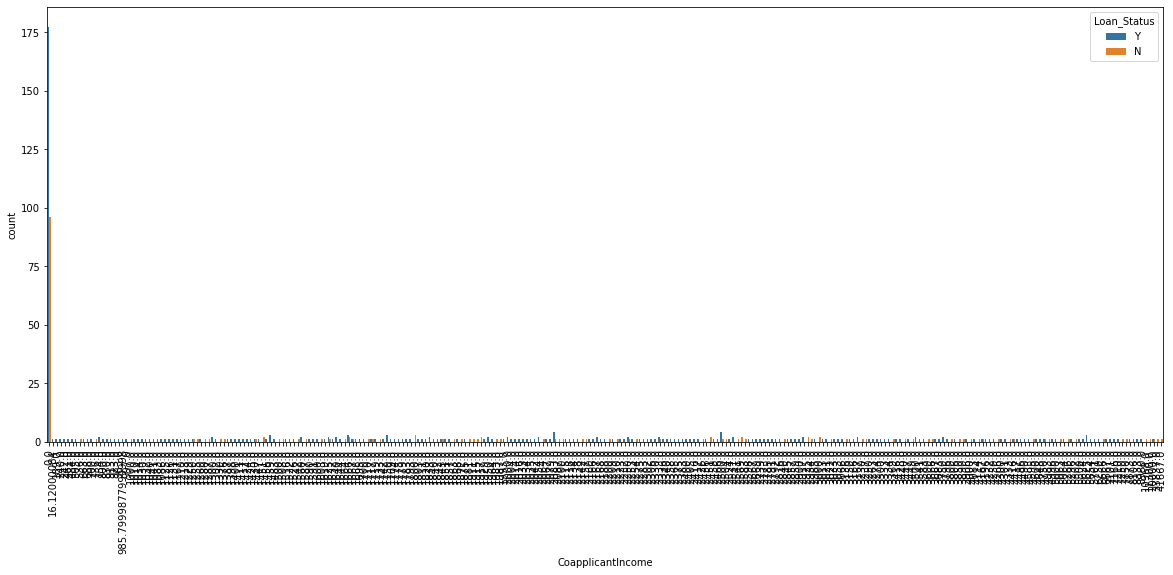

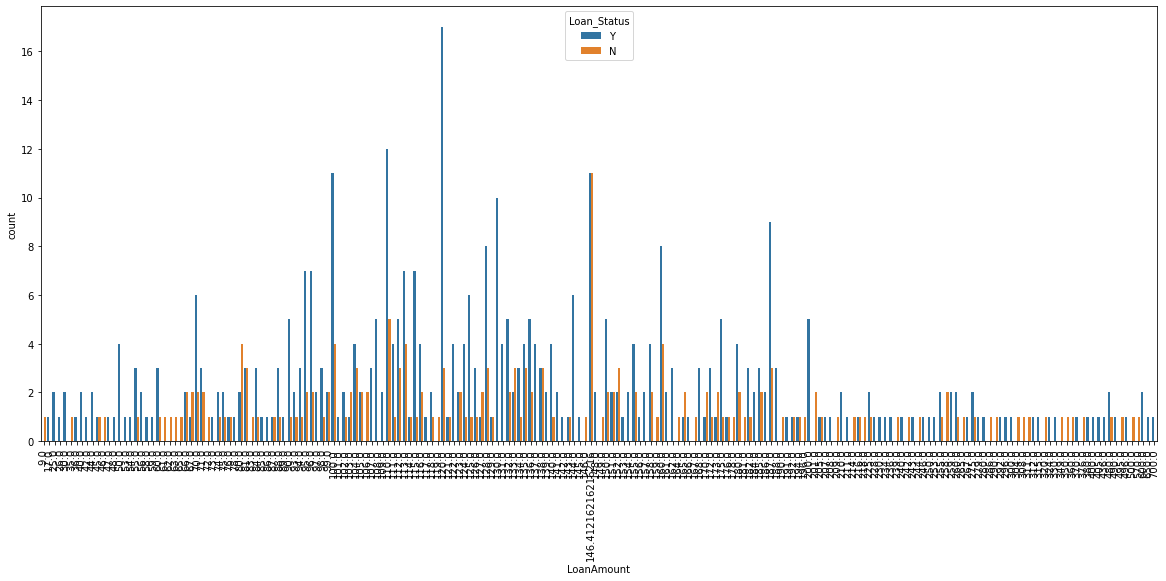

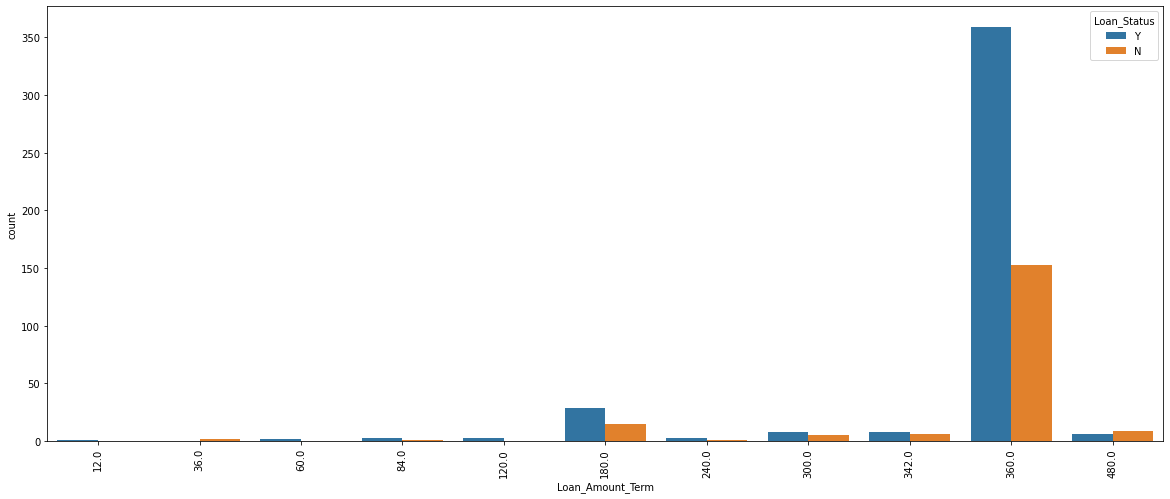

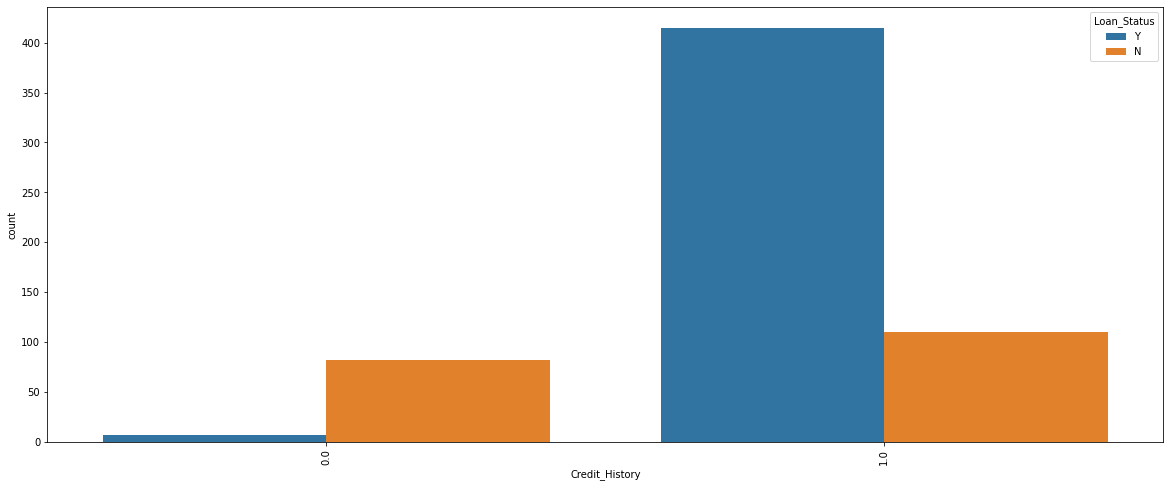

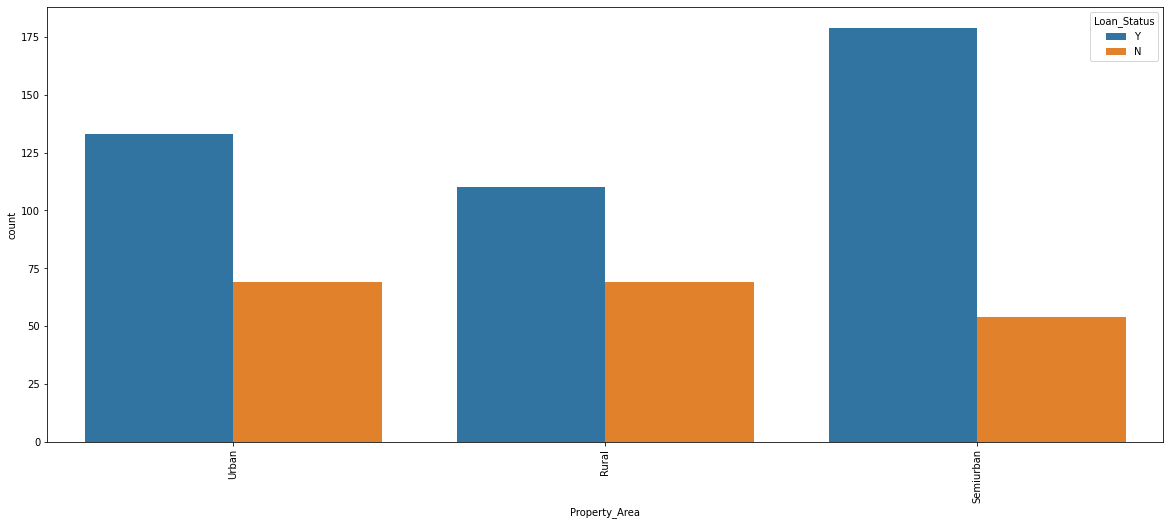

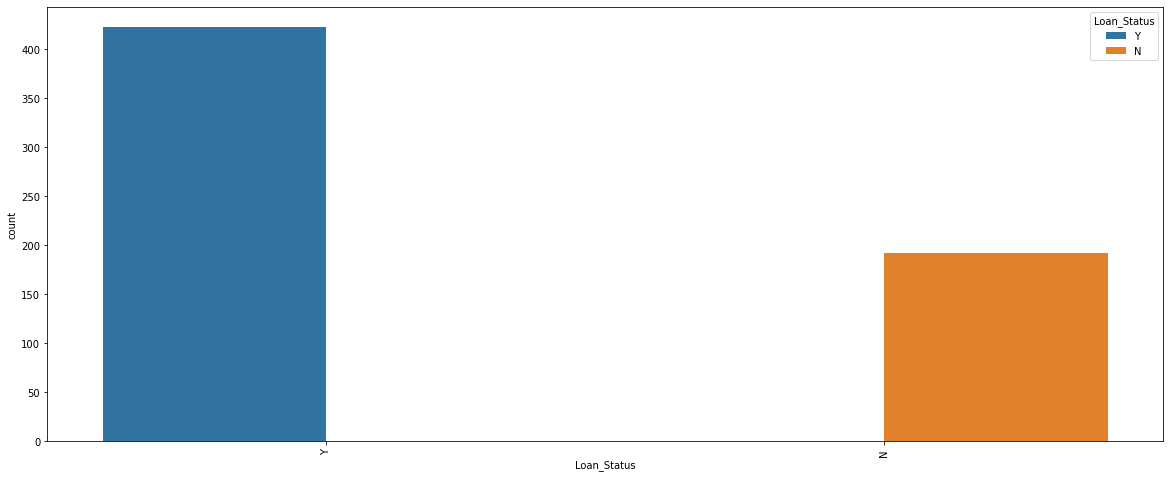

In [30]:
for i in df.columns:
    plt.figure(figsize=(20,8))
    sns.countplot(x=df[i],hue='Loan_Status',data=df)
    plt.xticks(rotation=90)
    plt.show()

From the above observations in the datset-

More males have taken loan than females and also ratio of male approvals are high.

married loans are approved are much more than non married.

Approved loans for people having no dependents are high.

Loans of graduate people are likely to be approved than non graduate one's

Applicants which are not self employed are higher in number of loan approvals. 

Majority of loans are taken with 360 months of loan amount terms.

People with credit history (1) are likely to get their loan approved.

people from semi urban area have higher loan approval rate.


As, there are so many categorical columns in the datset-, we are doing label encoding.

# Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

col=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in col:
    df[i] = le.fit_transform(df[i])

In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Correlation-

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.817590,0.386497,0.0,1.00,1.0,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


From the above observation-

The self employed is with average of 0.13.

The educated people with average of 21%.

The loan amount ranges from 9 to 700, with mean of 64.

The loan amount term ranges from 12 to 480 months. And majority of them have opted for 360 months as 25%,50% and 75% all have 360.

The applicant income ranges from 150 and maximum is 81000.

Average coapplicant income is 1621 and highest is 41667.

Average credit history is 0.85 with std of 0.35

<AxesSubplot:>

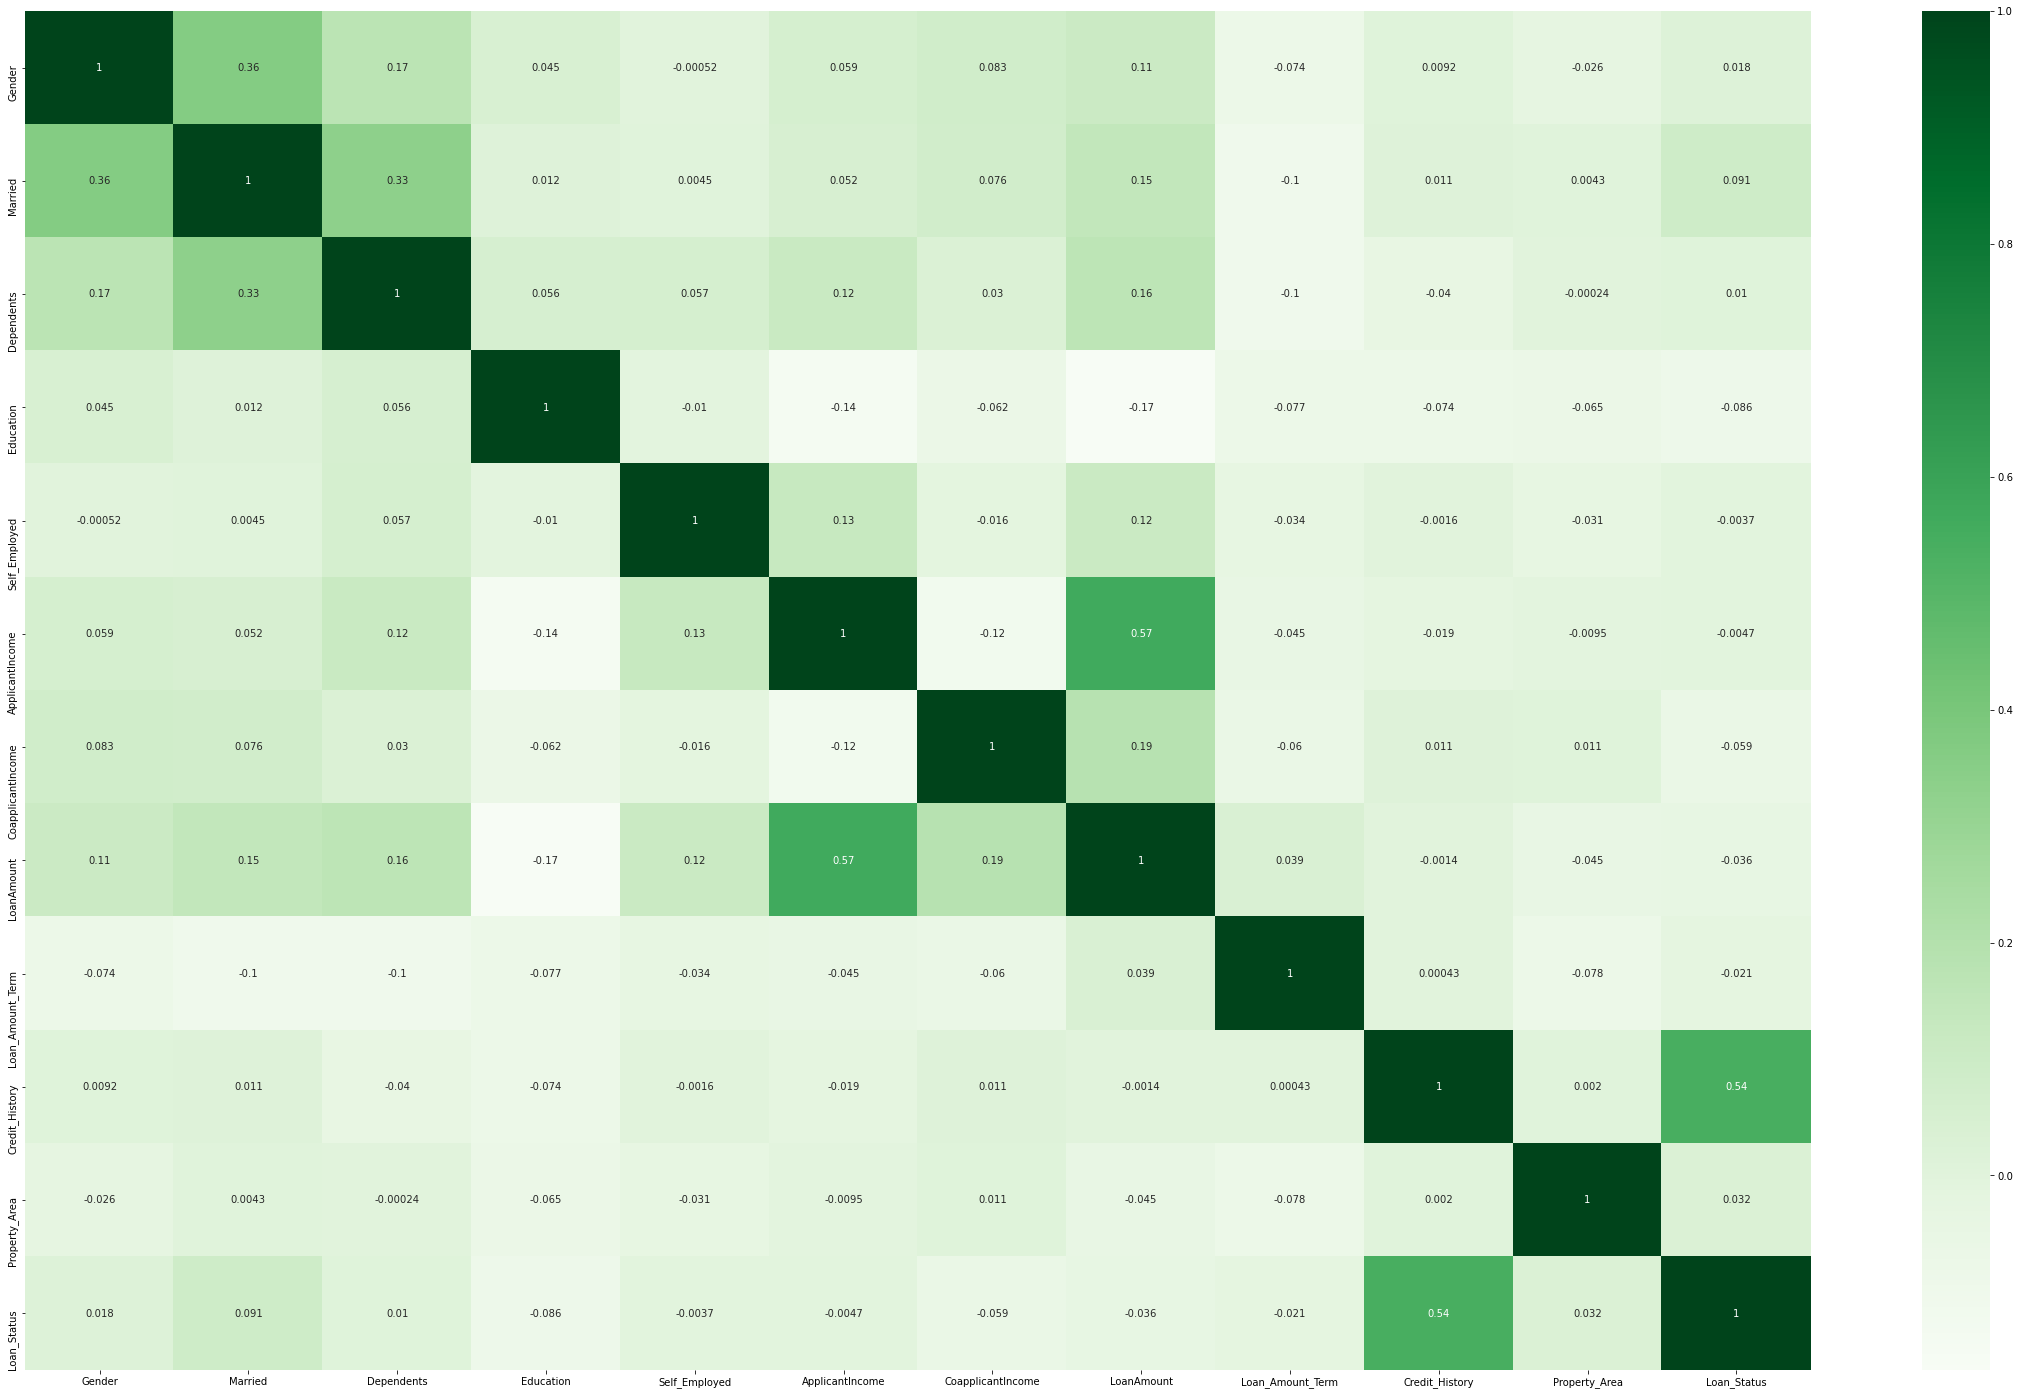

In [35]:
plt.figure(figsize=(40,25))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

From the above observations-

Loan status and credit history are positively correalted.

Applicant income and loan amount are positively correlated.

Education is least correlated with loan status.





# Data Cleaning

# outlier checking

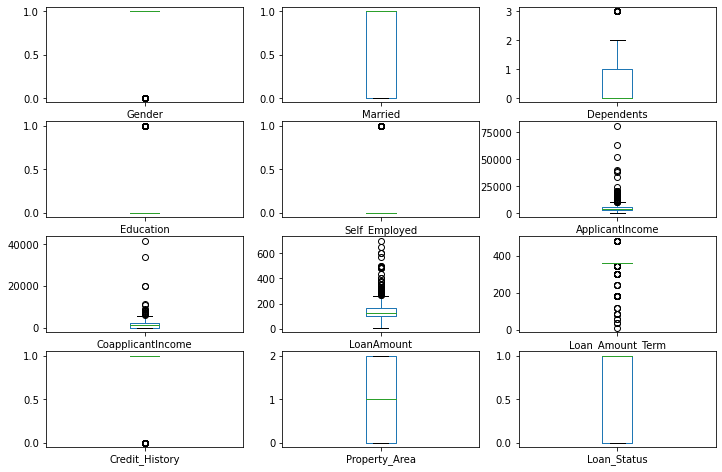

In [36]:
df.plot(kind='box',subplots=True,layout=(12,3),figsize=(12,25))
plt.show()

few outliers are presnt in the dataset, will handle that tto.

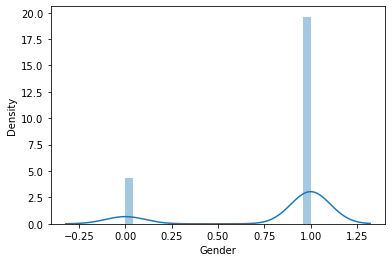

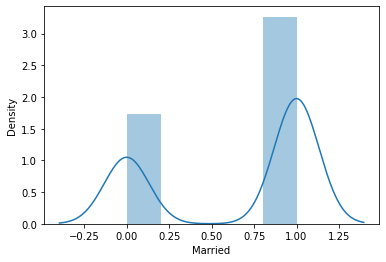

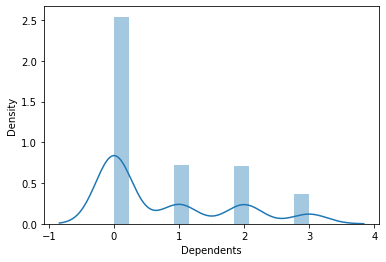

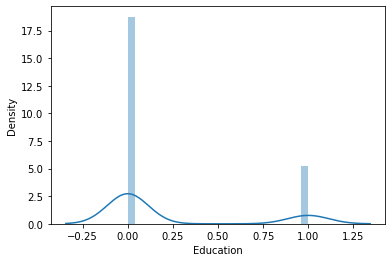

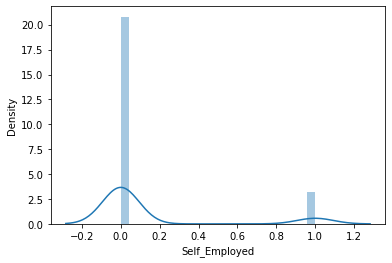

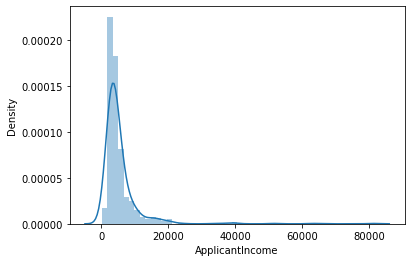

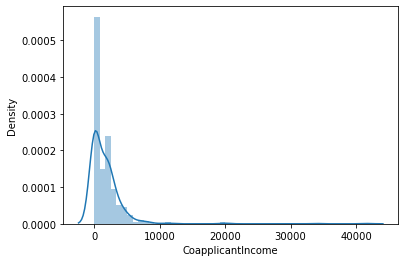

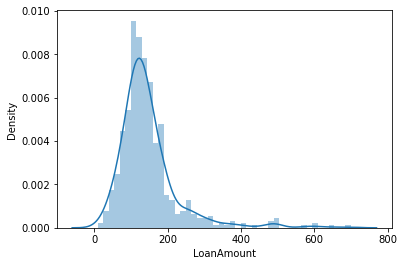

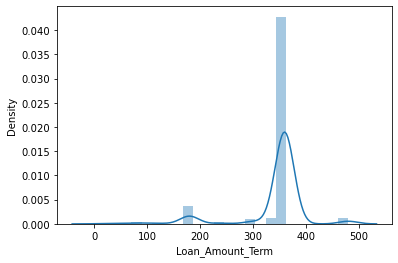

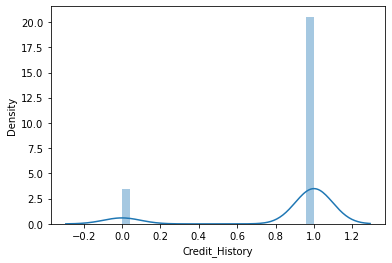

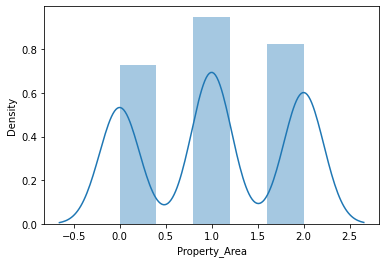

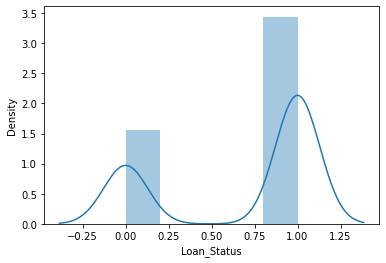

In [37]:
for i in df.columns:
    sns.distplot(df[i],kde=True)
    plt.show()

We can clearly see that skewness is presnt in the datset. Will handle that.

# Applying zscore

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(614, 12)

In [39]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int32), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int32))


In [40]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(614, 12)
(577, 12)


In [41]:
df=df_new
print(df.shape)

(577, 12)


In [42]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No null values are presnt in the dataset.

Now we are going to divide the target and feature columns

In [44]:
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

# Checking Skewness

In [45]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

In [50]:
for i in x:
        x[i]=np.log1p(x[i])

In [51]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.579572
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.819154
CoapplicantIncome   -0.247326
LoanAmount          -1.292454
Loan_Amount_Term    -2.724482
Credit_History      -1.976043
Property_Area       -0.419062
dtype: float64

# Standard Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=sc.fit_transform(x)
x=pd.DataFrame(k,columns = x.columns)

In [53]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.794822,-0.541961,-0.380580,0.692915,-1.133900,0.386602,0.265836,0.418513,1.093999
1,0.477137,0.733939,0.736931,-0.541961,-0.380580,0.272755,0.842487,0.089545,0.265836,0.418513,-1.420007
2,0.477137,0.733939,-0.794822,-0.541961,2.627567,-0.483622,-1.133900,-1.474783,0.265836,0.418513,1.093999
3,0.477137,0.733939,-0.794822,1.845150,-0.380580,-0.759272,0.891289,-0.055409,0.265836,0.418513,1.093999
4,0.477137,-1.362511,-0.794822,-0.541961,-0.380580,0.736209,-1.133900,0.303992,0.265836,0.418513,1.093999


In [54]:
x.shape,y.shape

((577, 11), (577,))

# Modelling

In [55]:
#models froms sickit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score

##ensemble technique
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


#Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
maxacc=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
        
    if acc>maxacc:
        maxacc=acc
        maxrs=i
    
print('Best accuracy is',maxacc,'on random state', maxrs)

Best accuracy is 0.8850574712643678 on random state 12


In [67]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=12)

In [68]:
LR=LogisticRegression()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
KNN=KNeighborsClassifier()
DTC=DecisionTreeClassifier()

In [69]:
model=[LR,RF,ADA,KNN,DTC]



****************** LogisticRegression() *******************


accuracy score: LogisticRegression()
0.9051724137931034
[[17 10]
 [ 1 88]]
              precision    recall  f1-score   support

           0       0.94      0.63      0.76        27
           1       0.90      0.99      0.94        89

    accuracy                           0.91       116
   macro avg       0.92      0.81      0.85       116
weighted avg       0.91      0.91      0.90       116

Cross Validation Score: 0.8180809595202397


auc score: 0.8091968372867249


roc_auc_score =  0.8091968372867249


AxesSubplot(0.125,0.808774;0.62x0.0712264)





****************** RandomForestClassifier() *******************


accuracy score: RandomForestClassifier()
0.8448275862068966
[[17 10]
 [ 8 81]]
              precision    recall  f1-score   support

           0       0.68      0.63      0.65        27
           1       0.89      0.91      0.90        89

    accuracy                           0.84       116
   macro

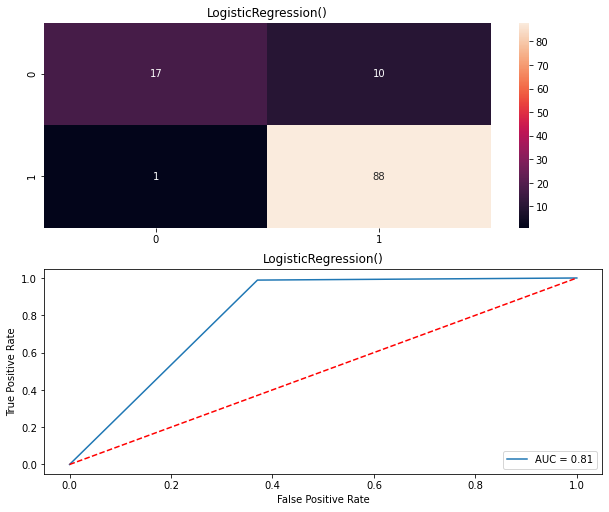

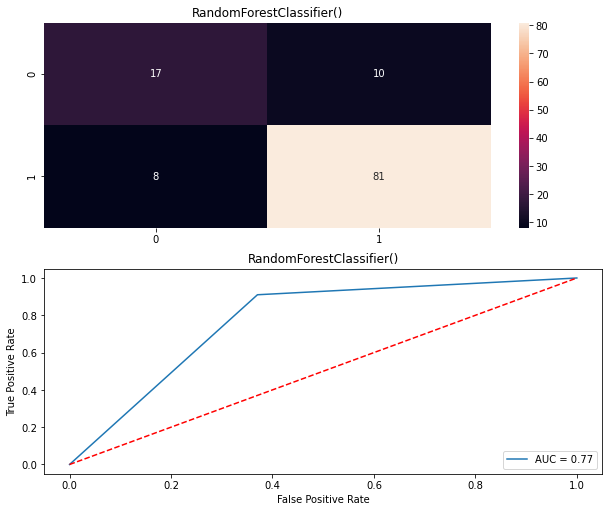

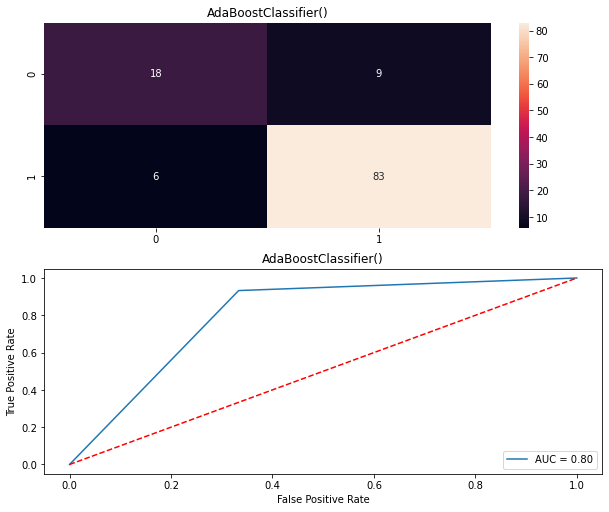

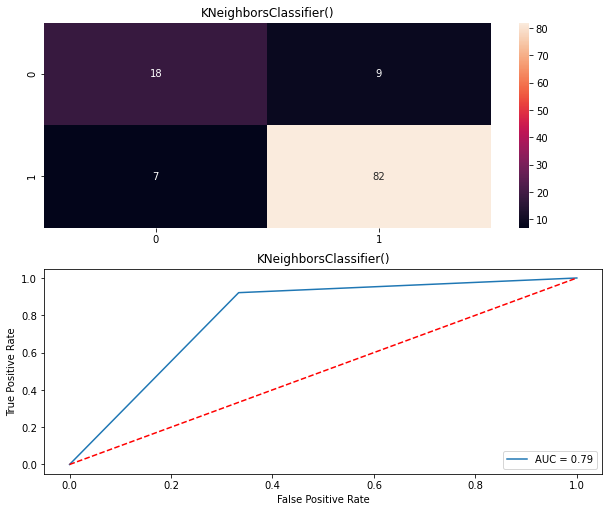

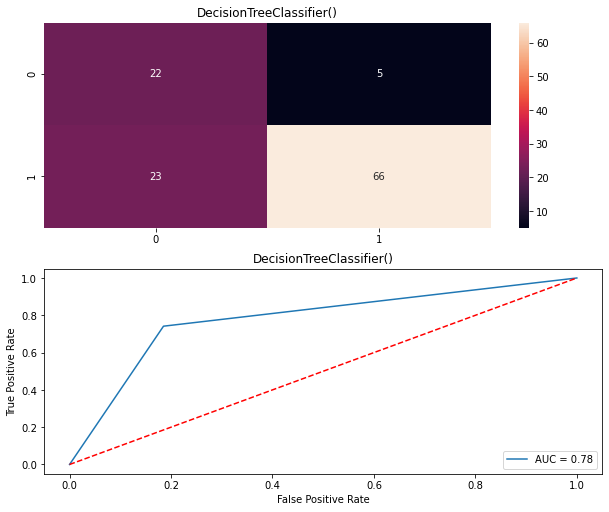

In [70]:
score=[]
cvs=[]
rocscore=[]
for i in model:
    print('\n')
    print('******************',i,'*******************')
    print('\n')
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    
    print('accuracy score:',i)
    score=accuracy_score(y_test,pred)
    print(score)
    
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print(classification_report(y_test,pred))
    
    cross=cross_val_score(i, x, y, cv=5, scoring='accuracy').mean()
    print('Cross Validation Score:',cross)
    cvs.append(cross)
    print('\n')
    
    print('auc score:',roc_auc_score(y_test,pred))
    print('\n')
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(i)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

# As, from the above observation, Logistic Regression is performing best with accuracy of 90%, cross val score of 82% and auc score of 81%

# Hyper Parameter Tuning

In [74]:
#logistic regression paramters

from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
parameters= dict(solver=solvers,penalty=penalty,C=c_values)
GCV=GridSearchCV(LR,parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [75]:
#Lets check the best parameters
GCV.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [76]:
predgcv=GCV.best_estimator_.predict(x_test)

In [77]:
print('Accuracy score:')
print(accuracy_score(y_test,predgcv))
print(confusion_matrix(y_test,predgcv))
print(classification_report(y_test,predgcv))
cvs_score=cross_val_score(GCV.best_estimator_, x, y, cv=10,scoring='accuracy')
print('Cross Validation Score:',score.mean())
print('auc score:',roc_auc_score(y_test,predgcv))

Accuracy score:
0.9051724137931034
[[17 10]
 [ 1 88]]
              precision    recall  f1-score   support

           0       0.94      0.63      0.76        27
           1       0.90      0.99      0.94        89

    accuracy                           0.91       116
   macro avg       0.92      0.81      0.85       116
weighted avg       0.91      0.91      0.90       116

Cross Validation Score: 0.7586206896551724
auc score: 0.8091968372867249


Text(0.5, 0, 'False Positive Rate')

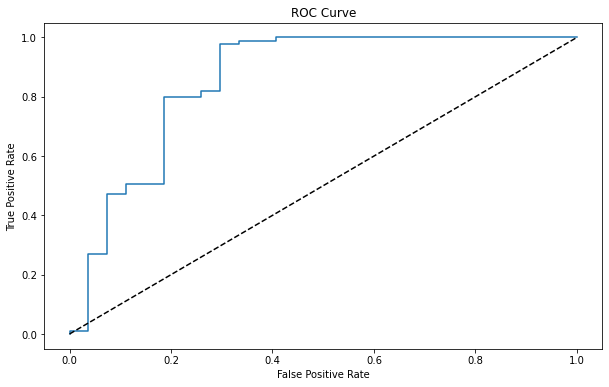

In [78]:
y_pred_prob=GCV.best_estimator_.predict_proba(x_test)[:,1]
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_prob)

plt.figure(figsize=(10,6))
plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, label='Logistic Regression')
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# MOdel saving

In [79]:
#import joblib
#joblib.dump(lr_mod,"Finalmodel.pkl")

# Completed